PCA

In [77]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [78]:
if __name__ == "__main__":
    
    dt_Ecommerce = pd.read_csv('./Data/ECommerce_consumer_behaviour.csv')

    columns_to_drop = ['reordered', 'department', 'product_name']
    dt_features = dt_Ecommerce.drop(columns=columns_to_drop, axis=1)
    dt_target = dt_Ecommerce['reordered']

    dt_features = StandardScaler().fit_transform(dt_features)
    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

    # Manejar los valores faltantes (NaN) en X_train
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)

    # Aplicar PCA al conjunto de datos sin valores faltantes
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train_imputed)

    # Manejar los valores faltantes (NaN) en X_test
    X_test_imputed = imputer.transform(X_test)

    # Aplicar PCA al conjunto de datos sin valores faltantes
    X_test_pca = pca.transform(X_test_imputed)

    # Crear y entrenar el modelo de regresión logística
    logistic = LogisticRegression(solver='lbfgs')
    logistic.fit(X_train_pca, y_train)

    # Evaluar el modelo en el conjunto de prueba
    accuracy = logistic.score(X_test_pca, y_test)
    print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.625


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

IPCA

In [79]:
if __name__ == "__main__":
    
    dt_Ecommerce = pd.read_csv('./Data/ECommerce_consumer_behaviour.csv')

    columns_to_drop = ['reordered', 'department', 'product_name']
    dt_features = dt_Ecommerce.drop(columns=columns_to_drop, axis=1)
    dt_target = dt_Ecommerce['reordered']

    dt_features = StandardScaler().fit_transform(dt_features)
    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

    # Manejar los valores faltantes (NaN) en X_train
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)

    # Aplicar IPCA al conjunto de datos sin valores faltantes
    ipca = IncrementalPCA(n_components=3, batch_size=10)
    X_train_ipca = ipca.fit_transform(X_train_imputed)

    # Manejar los valores faltantes (NaN) en X_test
    X_test_imputed = imputer.transform(X_test)

    # Aplicar IPCA al conjunto de datos sin valores faltantes
    X_test_ipca = ipca.transform(X_test_imputed)

    # Crear y entrenar el modelo de regresión logística con IPCA
    logistic_ipca = LogisticRegression(solver='lbfgs')
    logistic_ipca.fit(X_train_ipca, y_train)

    # Evaluar el modelo en el conjunto de prueba con IPCA
    accuracy_ipca = logistic_ipca.score(X_test_ipca, y_test)
    print(f"Exactitud del modelo con IPCA: {accuracy_ipca}")

Exactitud del modelo con IPCA: 0.6216666666666667


/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

Validar que los conjuntos de datos sean iguales

In [80]:
X_train.shape

(1399, 9)

In [81]:
y_train.shape

(1399,)

Validar cuales componenetes aportan mayor información

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

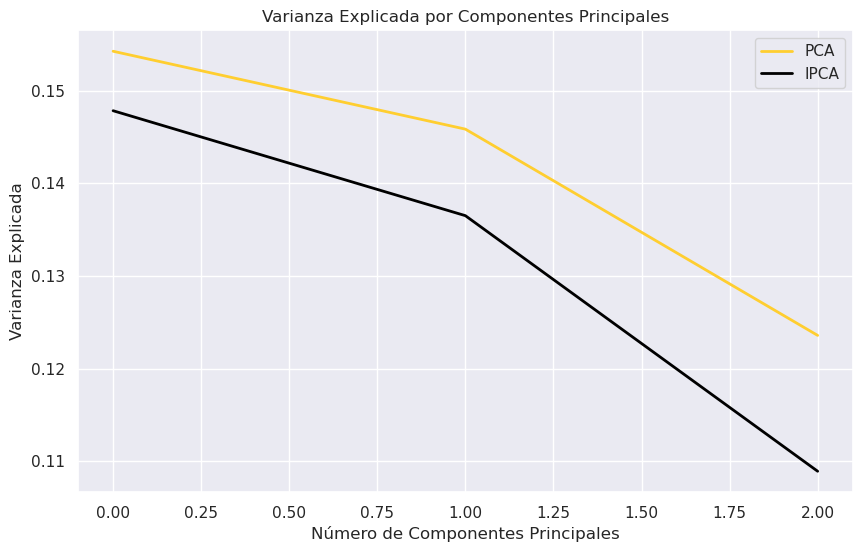

Exactitud del modelo con PCA: 0.625
Exactitud del modelo con IPCA: 0.6216666666666667


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la varianza explicada con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(pca.explained_variance_ratio_)), y=pca.explained_variance_ratio_, color="#FFCE30", lw=2, label='PCA')
sns.lineplot(x=range(len(ipca.explained_variance_ratio_)), y=ipca.explained_variance_ratio_, color="black", lw=2, label='IPCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componentes Principales')
plt.legend()
plt.show()

print(f"Exactitud del modelo con PCA: {accuracy}")
print(f"Exactitud del modelo con IPCA: {accuracy_ipca}")


Graficos PCA

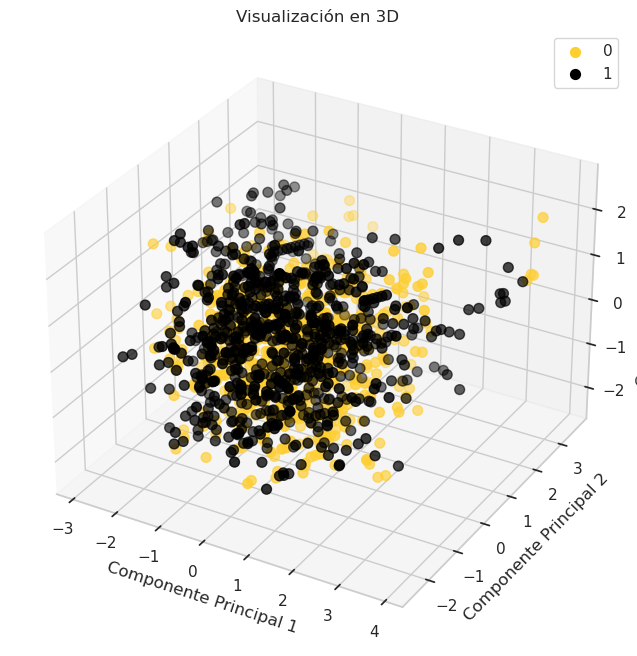

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear un DataFrame para Seaborn
df_3d = pd.DataFrame({
    'Componente Principal 1': X_train_pca[:, 0],
    'Componente Principal 2': X_train_pca[:, 1],
    'Componente Principal 3': X_train_pca[:, 2],
    'Etiqueta': y_train
})

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un mapa de colores con amarillo y negro
cmap = sns.color_palette(["#FFCE30", "#000000"])

# Graficar en 3D con Matplotlib
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separar los puntos según la etiqueta
for label, color in zip(df_3d['Etiqueta'].unique(), cmap):
    subset = df_3d[df_3d['Etiqueta'] == label]
    ax.scatter(subset['Componente Principal 1'], subset['Componente Principal 2'], subset['Componente Principal 3'], label=label, s=50, color=color)

# Configurar etiquetas y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Visualización en 3D')

# Configurar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


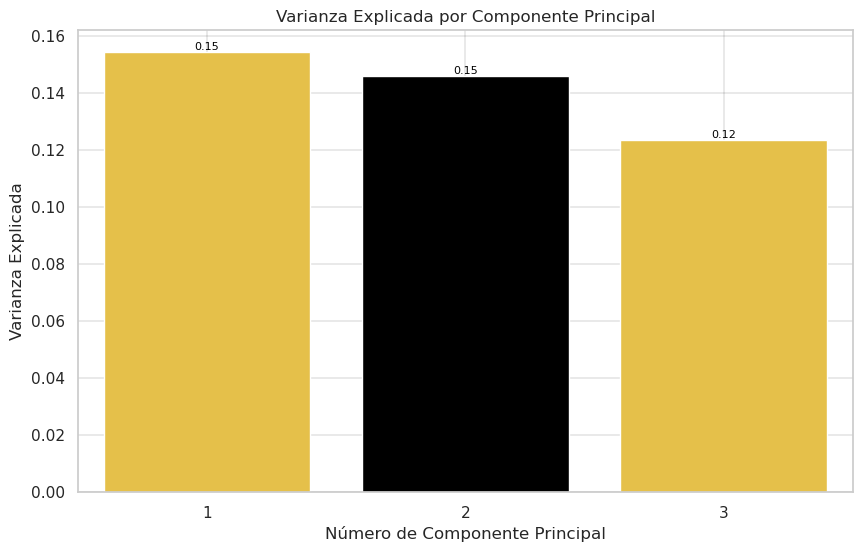

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear DataFrame para Matplotlib
df_bar = pd.DataFrame({
    'Número de Componente Principal': range(1, len(pca.explained_variance_ratio_) + 1),
    'Varianza Explicada': pca.explained_variance_ratio_
})

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear la gráfica de barras con Seaborn y Matplotlib
plt.figure(figsize=(10, 6))

# Intercalar los colores de las barras
colors = ["#FFCE30", "#000000"] * len(df_bar)  # Repite la lista de colores

barplot = sns.barplot(x='Número de Componente Principal', y='Varianza Explicada', data=df_bar, palette=colors)

# Personalizar la apariencia
barplot.set(xlabel='Número de Componente Principal', ylabel='Varianza Explicada', title='Varianza Explicada por Componente Principal')
barplot.set_facecolor('white')
barplot.grid(color='#000000', linestyle='-', linewidth=0.25, alpha=0.5)

# Agregar etiquetas a las barras
for index, value in enumerate(df_bar['Varianza Explicada']):
    barplot.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8, color='#000000')

# Mostrar la gráfica
plt.show()

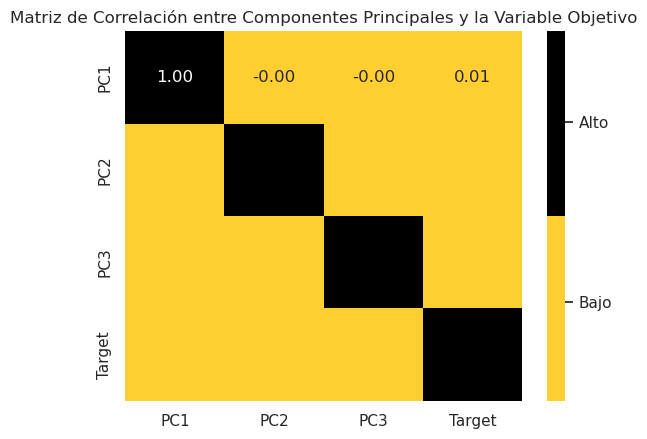

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que ya tienes X_train_pca y y_train
components_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3'])
components_df['Target'] = y_train

corr_matrix = components_df.corr()

# Crear una paleta de colores con amarillo y negro
cmap = sns.color_palette(["#FFCE30", "#000000"])

# Crear un gráfico de calor para la matriz de correlación
heatmap = sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")

# Personalizar el gráfico
plt.title('Matriz de Correlación entre Componentes Principales y la Variable Objetivo')

# Agregar leyenda
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Bajo', 'Alto'])

plt.show()

Graficos IPCA

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


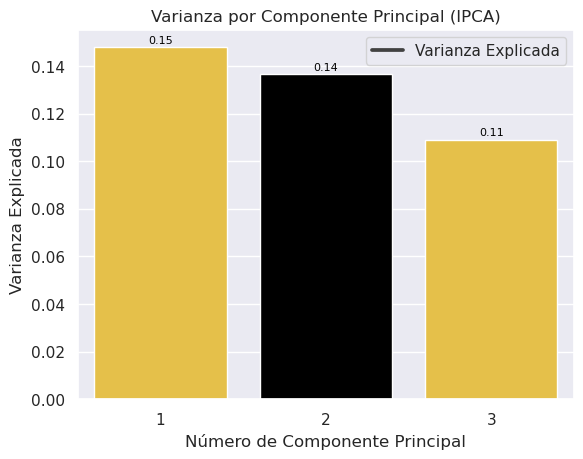

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Establecer el estilo de Seaborn para un impacto visual más alto
sns.set_theme()

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = ipca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Crear una paleta de colores con amarillo y negro
colors = ["#FFCE30", "#000000"]
cmap = sns.color_palette(colors)

# Crear un gráfico de barras para la varianza explicada
barplot = sns.barplot(x=np.arange(1, len(explained_variance_ratio) + 1), y=explained_variance_ratio, palette=cmap)

# Añadir etiquetas y valores numéricos
for i, ratio in enumerate(explained_variance_ratio):
    barplot.text(i, ratio + 0.001, f'{ratio:.2f}', ha='center', va='bottom', fontsize=8, color='#000000')

# Personalizar el gráfico
plt.title('Varianza por Componente Principal (IPCA)')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')

# Agregar leyenda
plt.legend(['Varianza Explicada'])

plt.show()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

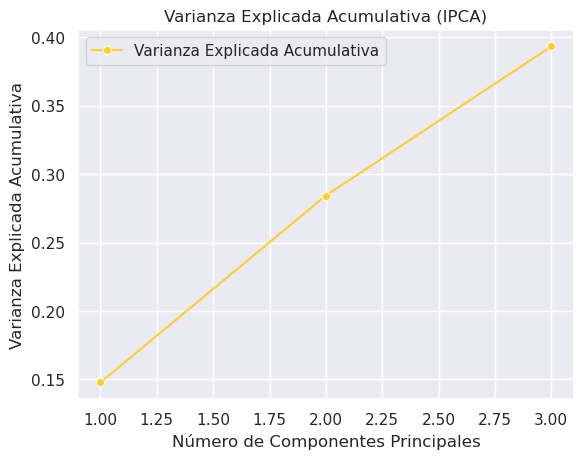

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Establecer el estilo de Seaborn para un impacto visual más alto
sns.set_theme()

# Gráfico de línea para la varianza explicada acumulativa
cumulative_variance_ratio = ipca.explained_variance_ratio_.cumsum()

# Gráfico de línea para la varianza explicada acumulativa
sns.lineplot(x=range(1, len(cumulative_variance_ratio) + 1), y=cumulative_variance_ratio, color='#FFCE30', marker='o', linestyle='-')
plt.title('Varianza Explicada Acumulativa (IPCA)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')

# Agregar leyenda
plt.legend(['Varianza Explicada Acumulativa'])

plt.show()